# Описание проекта

Вы работаете в интернет-магазине _Стримчик_ , который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура *ESRB* (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файла

In [2]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт библиотеки matplotlib.pyplot для работы с графиками
import numpy as np # импорт библиотеки numpy
from scipy import stats as st # импорт библиотеки scipy

import warnings
warnings.filterwarnings(action='ignore')# игнорируем предупреждения 


import seaborn as sns# импорт библиотеки seaborn
%matplotlib inline

plt.style.use('seaborn-pastel')# стиль графиков

In [3]:
df = pd.read_csv('/datasets/games.csv') # чтение файла с данными и сохранение в df

In [4]:
pd.set_option('display.max_columns', None) # вывод всех столбцов

In [4]:
df.head() # получение первых 5 строк таблицы df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()# получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe(include = 'all') # описание столбцов 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


### Вывод

Согласно документации к данным: 

Таблица `df`:

* `Name` — название игры;
* `Platform` — платформа;
* `Year_of_Release` — год выпуска;
* `Genre` — жанр игры;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100);
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В столбцах `Critic_Score` ,`User_Score` ,`Rating`  присуствует пропуски. Все названия столбцов начинаются с большой буквы. В столбце `User_Score` самое часто встречающее значение - это **tbd**. Такая абревиатура определеяется как _подлежит_ _определению_.

## Предобработка данных

In [ ]:
df.columns = [x.lower() for x in df.columns] # приведение названия столбцов к нижнему регистру

In [8]:
for row in ['name','platform','genre']: # приведение строк к нижнему регистру
    df[row] = df[row].str.lower()


In [9]:
df.duplicated().sum() # проверка на явные дубликаты

0

In [10]:
df.isna().sum() # подсчёт пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
df = df.dropna(subset = ['name','year_of_release','genre']) # удаление пропусков  в столбцах

Пропуски в колонках `name`,`year_of_release`,`genre` занимают меньше 1% от всего количества данных. Такие данные можноисключить из анализа.

In [12]:
df['user_score'] = df['user_score'].replace('tbd',-1)# замена значения в строке tbd на -1
df['user_score'] = df['user_score'].fillna(-1) # замена пропусков на -1


Значение в колонке `user_score` замениняем на **-1** , для того чтобы в последствии можно было его отфильтровать.

In [13]:
for row in ['year_of_release','critic_score']: # замена вещественных значений на целочисленные
    df[row] = df[row].astype('Int64')

Заменили колонку с указанием года и оценка критиков на целочисленное значение.

In [14]:
df['user_score'] = df['user_score'].astype('float64') # преобразование значений столбца 'user_score' в вещественные значения

Заменили колонку оценка пользователя на вещественные значения так как оценки имеют дробную часть.

In [15]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] # суммарное продажи во всез регионах

In [16]:
df.shape # размер исследуемой таблице

(16444, 12)

### Вывод

Привели все данные к единому стилю. Удалили и замени пропуски в стоблцах. Произвели изменения типов данных. Исследуемая таблица имеет размер в 12 колонок и 16444 строк.

Пропуски в данных возможно произошли из-за невнесения их в текущюю таблицу по причине не полной оценки игр.

In [17]:
# Комментарий ревьюера
print(df.rating.isna().sum(), df.rating.isna().sum()/len(df))
df['rating'].value_counts()

6676 0.40598394551204087


E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

В более  чем 40 % значений в колонке `rating` находятся пропуски. Эти пропуски обуславливаются тем,что рейтинга ESRB  предназначен для маркировки игр для США и Канады, а остальной мир маркирует по другому .Такие пропуски пометим значением `unknow`.

In [18]:
df['rating'] = df['rating'].fillna('unknow')# замена пропусков 

In [19]:
df['rating'].value_counts()

unknow    6676
E         3921
T         2905
M         1536
E10+      1393
EC           8
K-A          3
AO           1
RP           1
Name: rating, dtype: int64

## Исследовательский анализ данных

In [20]:
%config InlineBackend.figure_format = 'retina' # графики сделали лучше

Посмотрим как менялись продажи по годам.

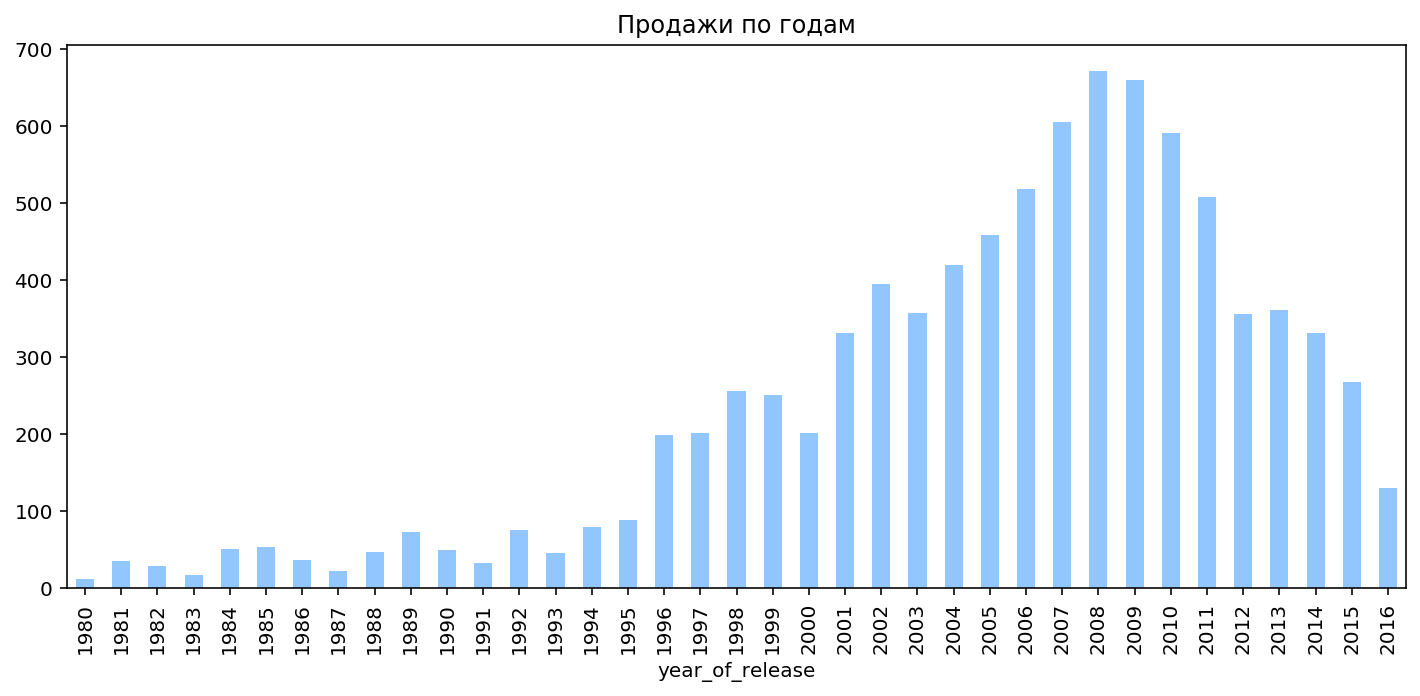

In [21]:
df.groupby('year_of_release')['total_sales'].sum().plot(kind = 'bar',  # построили гистограмму по годам
                                                        figsize = (12,5),
                                                        title = 'Продажи по годам'); 

По гистограмме видно,что максимальная продажа была в **2008** году и составляла **671.50 млн** проданных копий.  После **2008** продажи постепенно *падают*. По отношение **2008** к **2015** прожажи упали на **40 %**. Количество проданных копий за **2015** год находится на уровне **1998** и **1999** года.

Для анализа данные по продажам целесообразно рассматривать начиная с 2012 год по 2016 год. Пик падения продаж прошел. Наблюдается стагнация в продажах с последующим снижением.

Исследуем какие продажи были у  различных платформ.

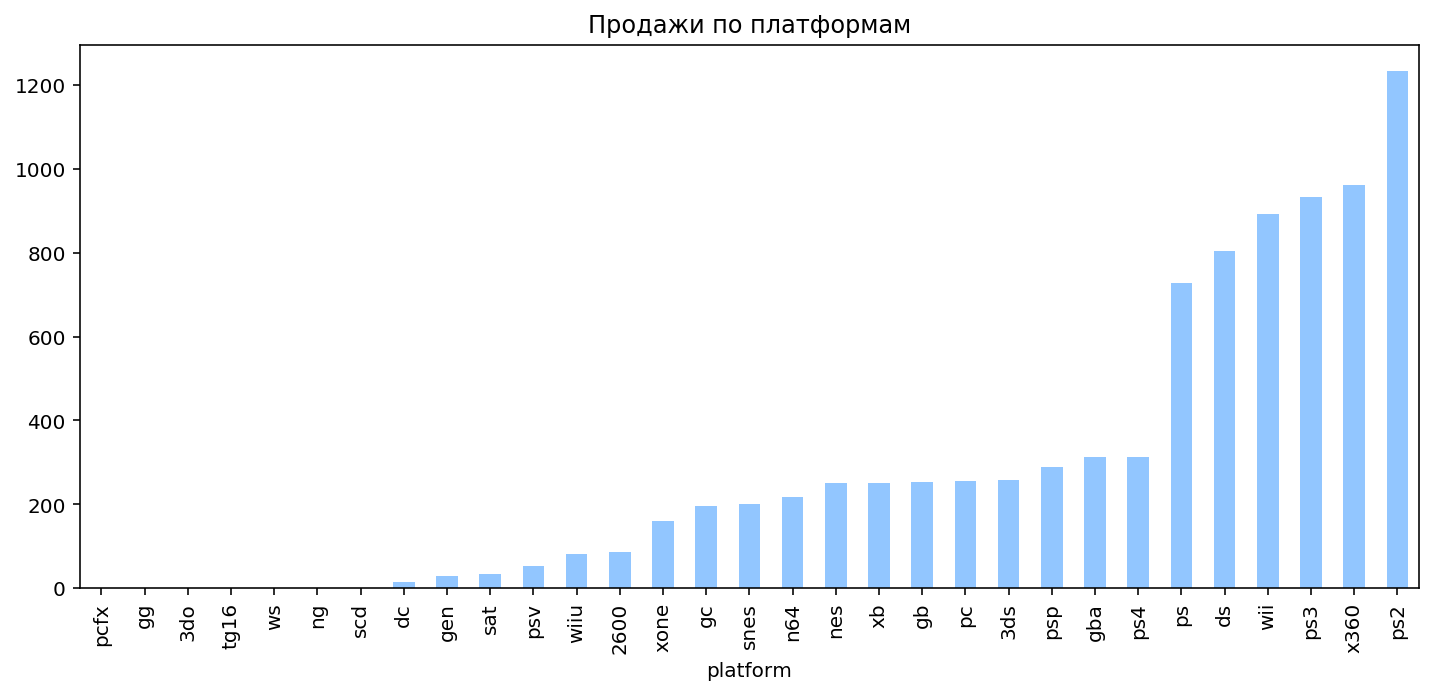

In [22]:
df.groupby('platform')['total_sales'].sum().sort_values().plot(kind='bar',      # построили гистограмму по платформам
                                                               figsize=(12,5),
                                                               title = 'Продажи по платформам');

Наибольшие продажи были на платформах _ps2_, _x360_, _ps3_, _wii_, _ds_, _ps_.  Продажи на платформе _ps2_ больше чем в 4 раза чем продажи платформы _ps4_.

Проанализируем распределение продаж по платформа за весь исследуемый период.

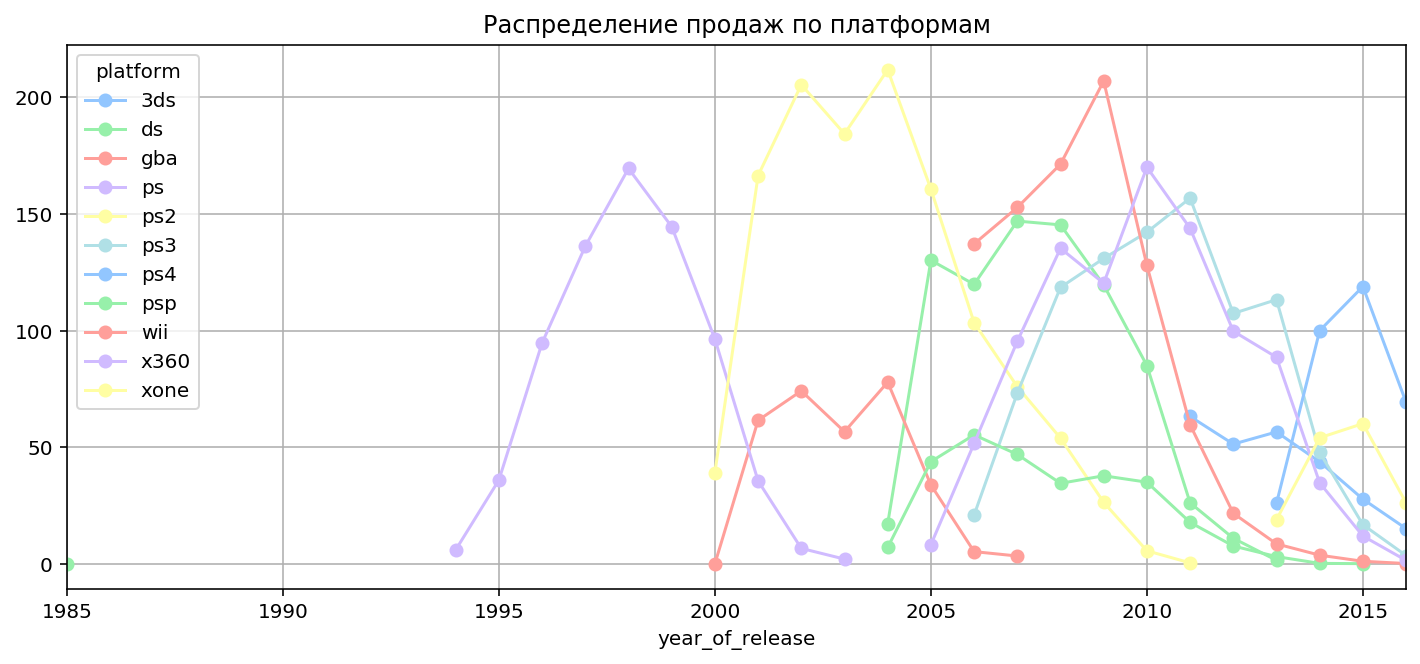

In [23]:
list = ['ps2', 'x360','ps3','wii','ds','ps','ps4','gba','psp','3ds','xone'] # построили распределение продаж по платформам
df.query('platform == @list').pivot_table(index='year_of_release', 
                                          columns ='platform',
                                          values='total_sales',
                                          aggfunc='sum').plot(style='o-',
                                                              grid=True,figsize=(12,5),
                                                              title = 'Распределение продаж по платформам');


Пик продаж по платформам достигается в среднем после _5 лет_ после выхода на рынок. Платформа существует на рынке в среднем _10 лет_. Период, при котром исчезает платформа и появляется новая в среднем равен _6 лет_.

В 2013 появились две платформы ,которые показывали рост по продажам - это 'xone' и ps4

In [24]:
df_current_period = df.query('year_of_release >= 2012') # фильтр по актуальному периоду с 2012 по 2016
df_current_period.shape # размер таблицы

(2886, 12)

Данных осталось около **17 %** от изначального.

Построим распределение по продажам с 2012 по 2016 год по платформам.

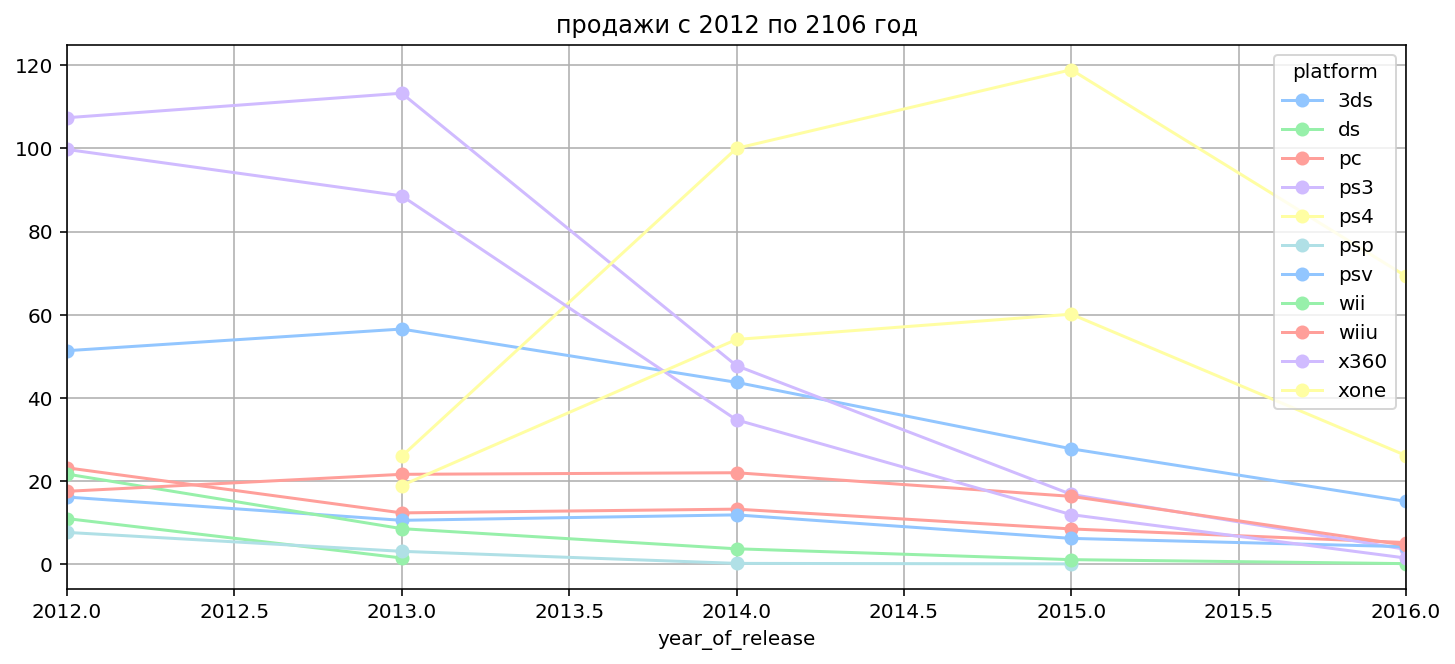

In [25]:
df_current_period.pivot_table(index='year_of_release', # распредение прадаж по годам
                              columns ='platform',
                              values='total_sales',
                              aggfunc='sum').plot(style='o-',
                                                  grid=True,
                                                  figsize=(12,5),
                                                  title='продажи с 2012 по 2106 год');

Наблюдается рост продаж по платформам **ps4** и **xone** в периоде с 2013 по 2015 год. Также незначительный рост показывали платформы **ps3** и **3ds** в период с 2012 по 2013 год. В остальном же платформы показываю на рассматриваемом периоде **регресс** в продажах.

Стоим диаграмму размаха для продаж по платформам.

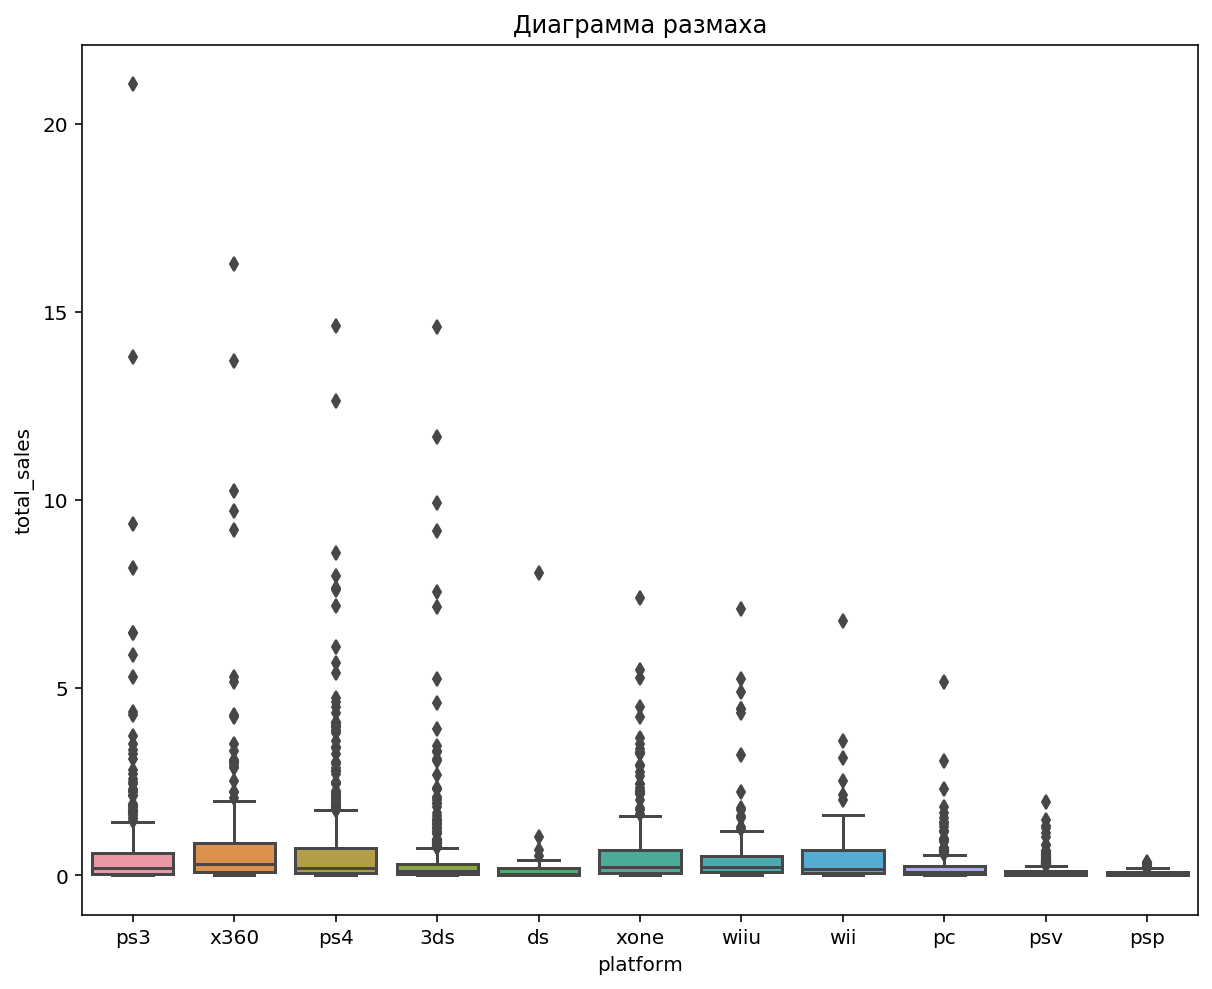

In [26]:
plt.figure(figsize=(10,8))# построили диаграмму размаха по платформам
(sns.boxplot(data = df_current_period, y ='total_sales' , x= 'platform').set(title='Диаграмма размаха'))
plt.show();

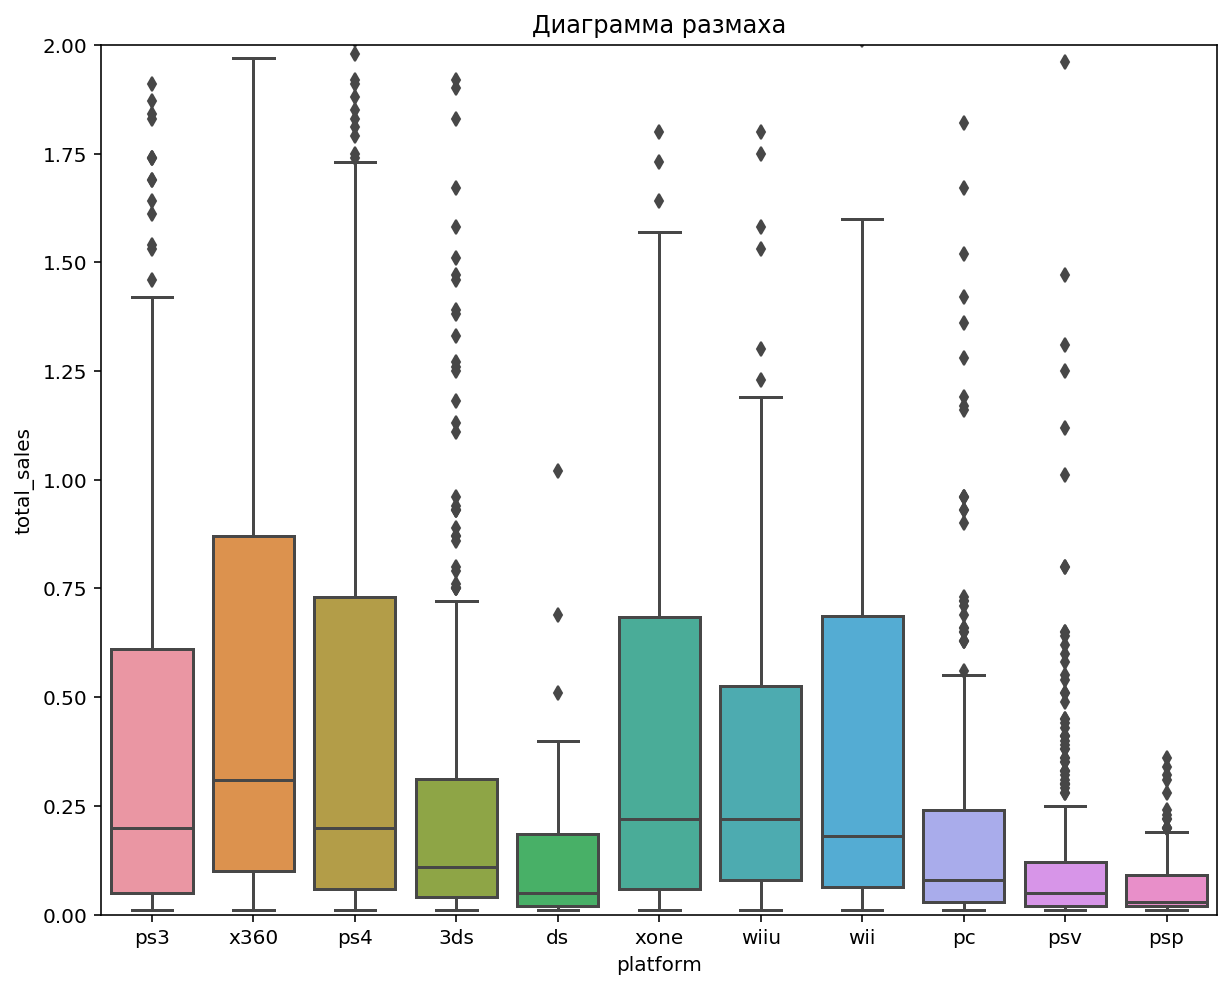

In [27]:
plt.figure(figsize=(10,8))# построили диаграмму размаха по платформам
(sns.boxplot(data = df_current_period, y ='total_sales' , x= 'platform').set(title='Диаграмма размаха',ylim=[0,2]))
plt.show();

Продажи по платформам в каждом исследуемом случае **наблюдается наличие выбросов**. Медиана **выше** всех у платформы _x360_ и составляет 0.30. Также размах в плаформе _x360_ идет от 0 и практически до 2. **Наименьшие** продажи показывает платформа _psp_, медиана ,которой близка к нулю. У четырех платформах наблюдается практически **одинаковая** медиана - _ps3_, _ps4_, _xone_, _wiiu_.

Проверим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

In [28]:
df_current_period.query('platform == "ps4" and user_score!= -1').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.268597,-0.197550,-0.130492,-0.239292,-0.019983,0.152447,-0.241389
na_sales,-0.268597,1.000000,0.717128,0.534556,0.916074,0.414241,-0.020933,0.894790
eu_sales,-0.197550,0.717128,1.000000,0.523301,0.935533,0.346044,-0.048925,0.951925
jp_sales,-0.130492,0.534556,0.523301,1.000000,0.570450,0.322057,0.171332,0.595710
other_sales,-0.239292,0.916074,0.935533,0.570450,1.000000,0.408465,-0.035639,0.997817
critic_score,-0.019983,0.414241,0.346044,0.322057,0.408465,1.000000,0.557654,0.405895
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
total_sales,-0.241389,0.894790,0.951925,0.595710,0.997817,0.405895,-0.031957,1.000000


Завимость между глобальными продажами и отзывами пользователей совсем нет. Но между глобальными продажами и отзывами критиков наблюдается линейная зависимость. Следовательно, потенциальные покупатели игр больше рассматривает какие отзывы оставляют критики.

Для всех популярных платформ постоим диаграммы рассеивания.

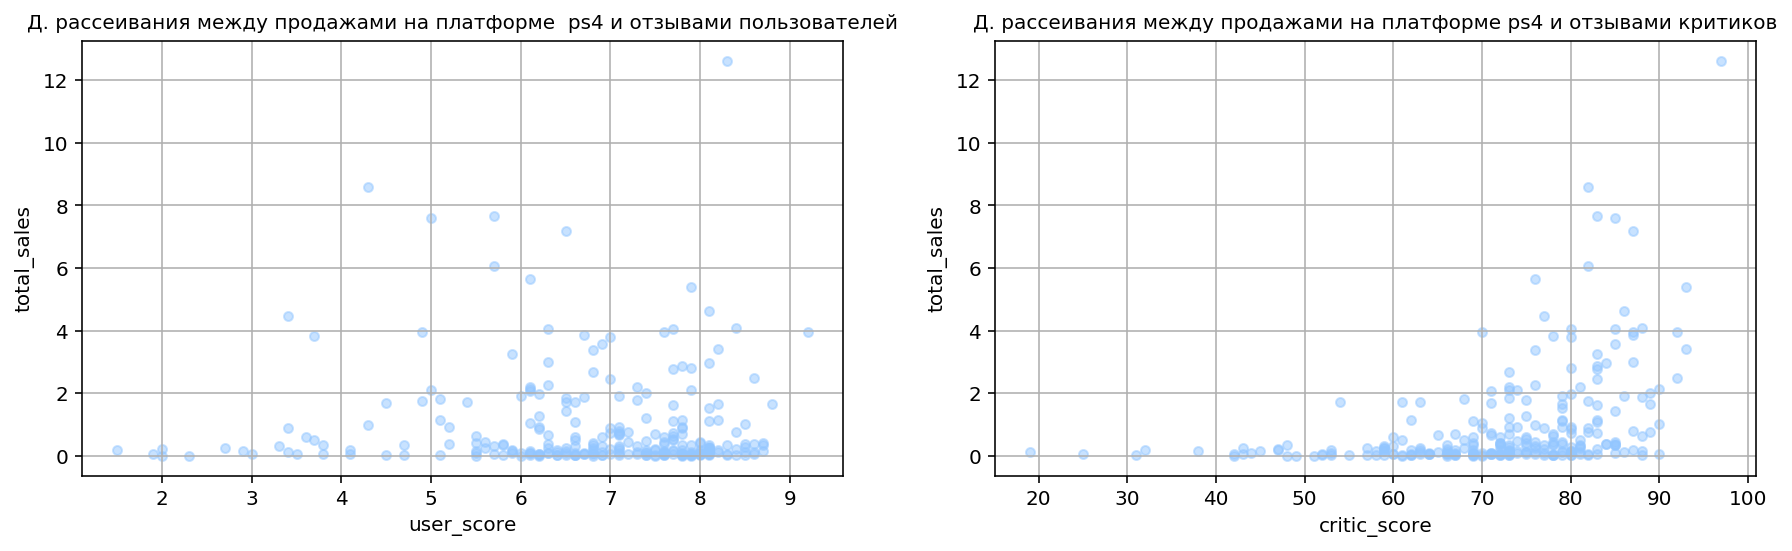

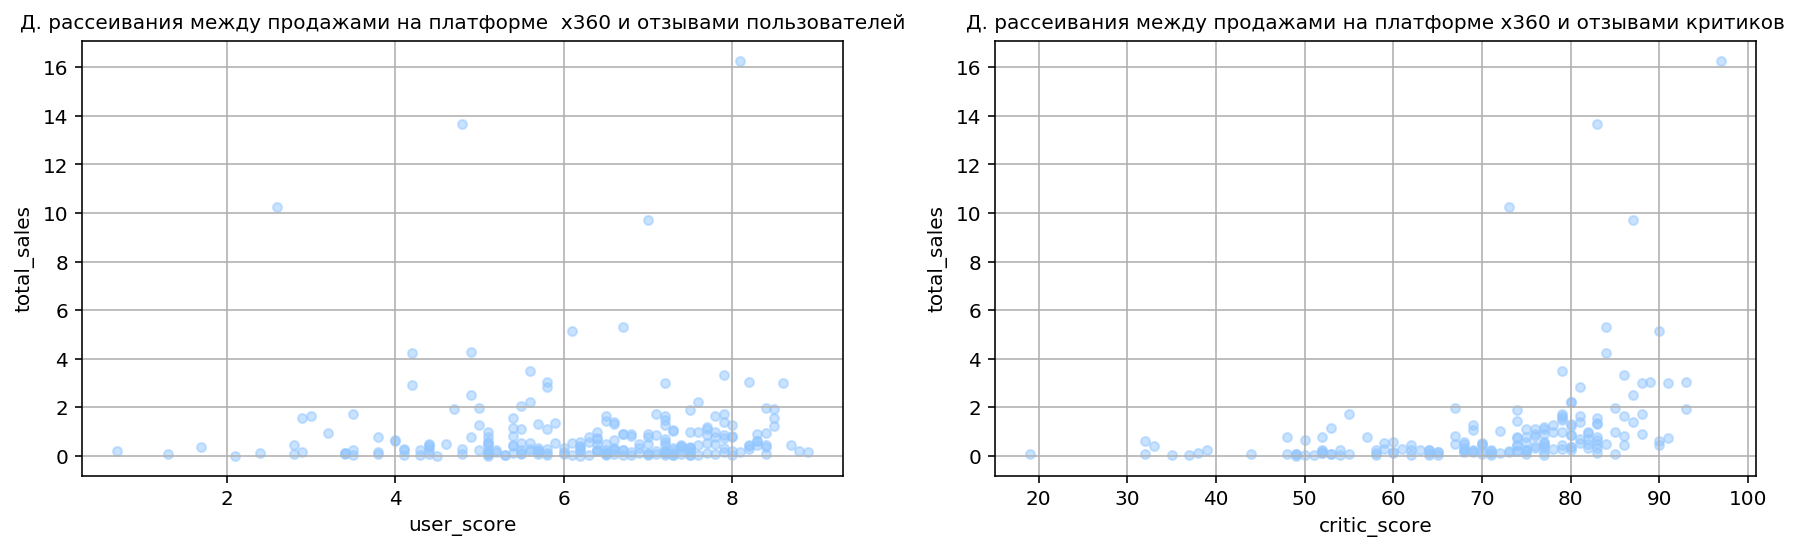

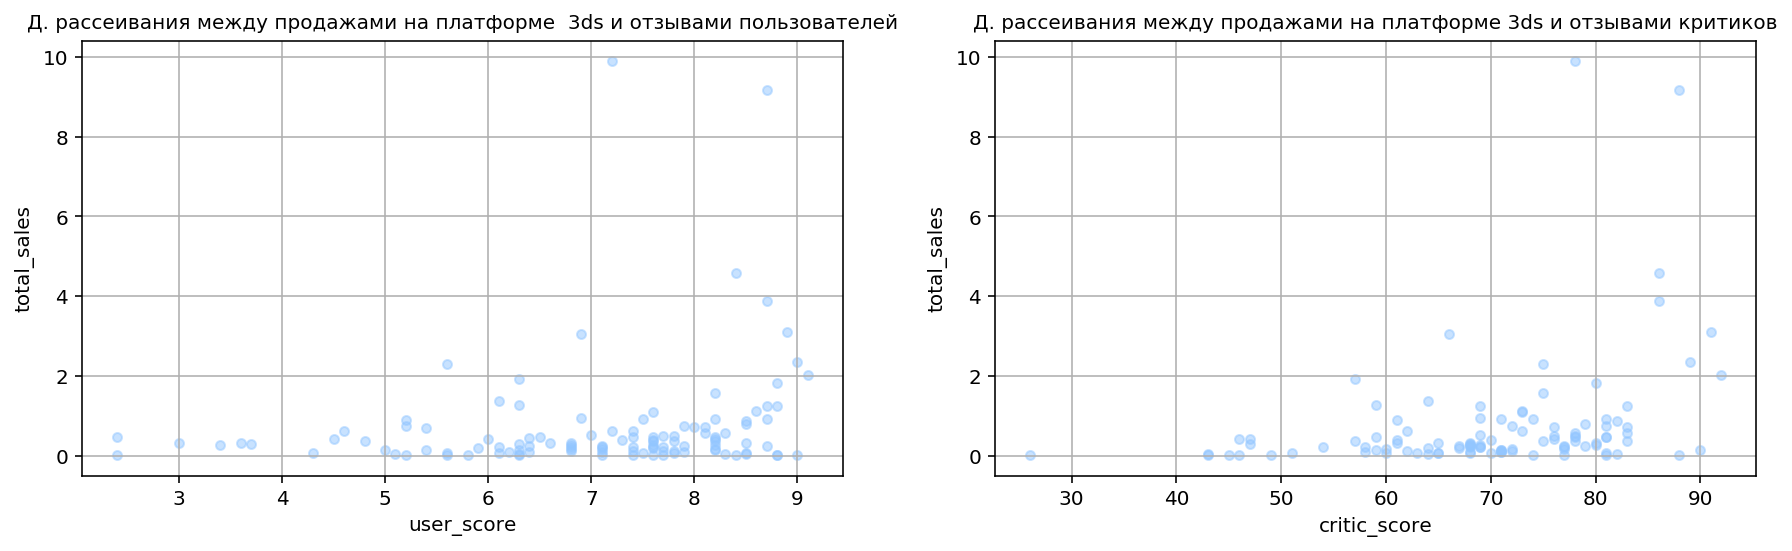

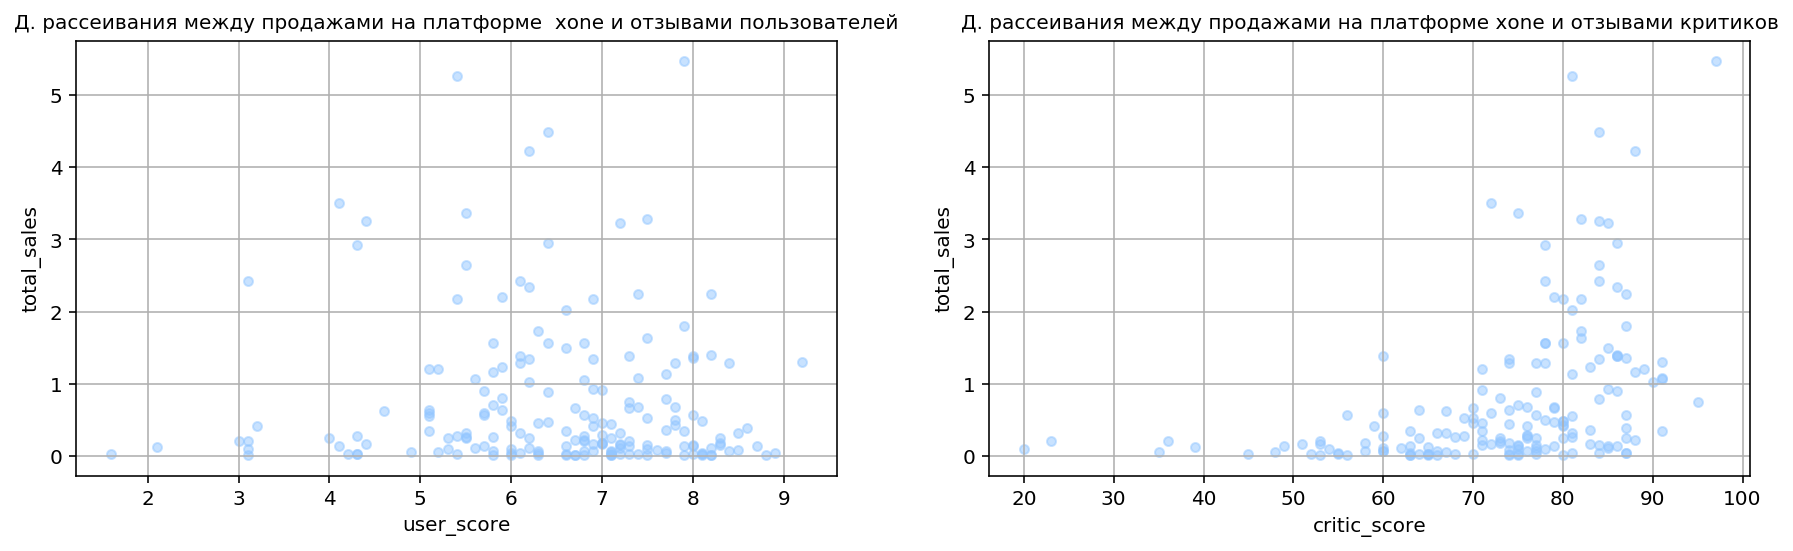

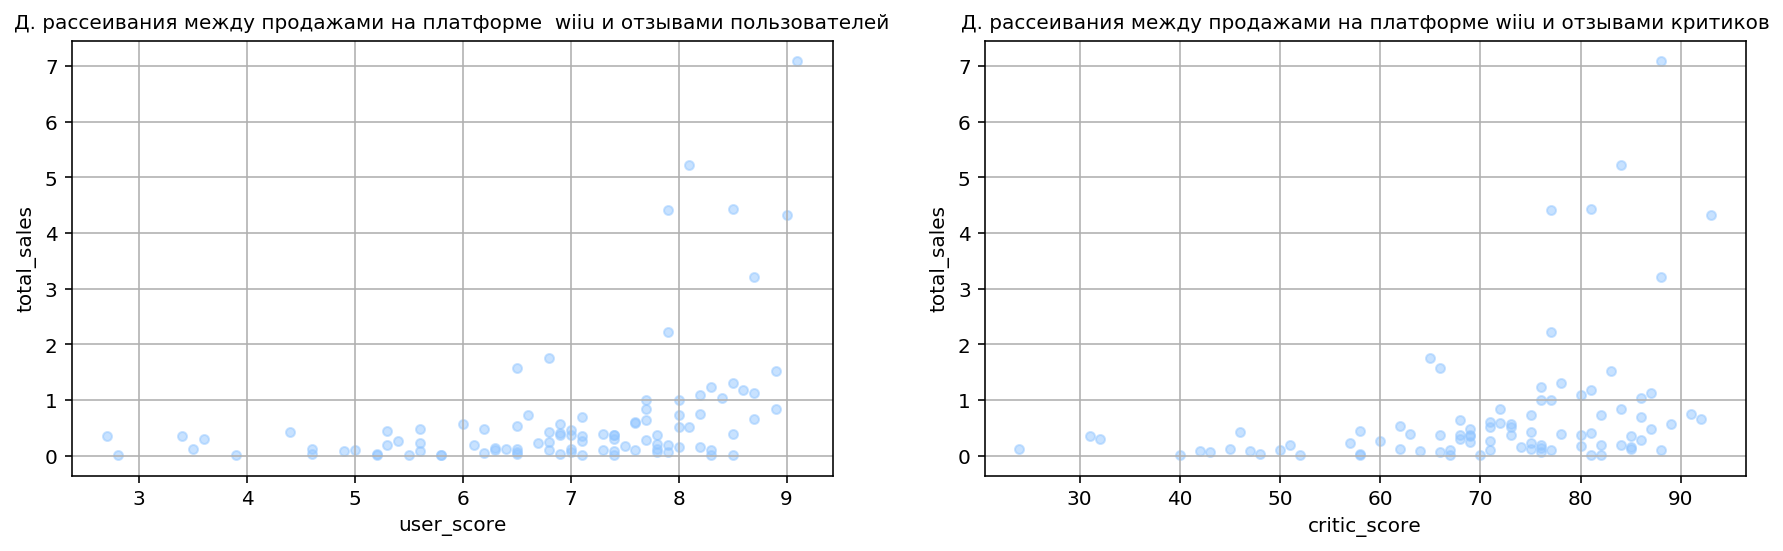

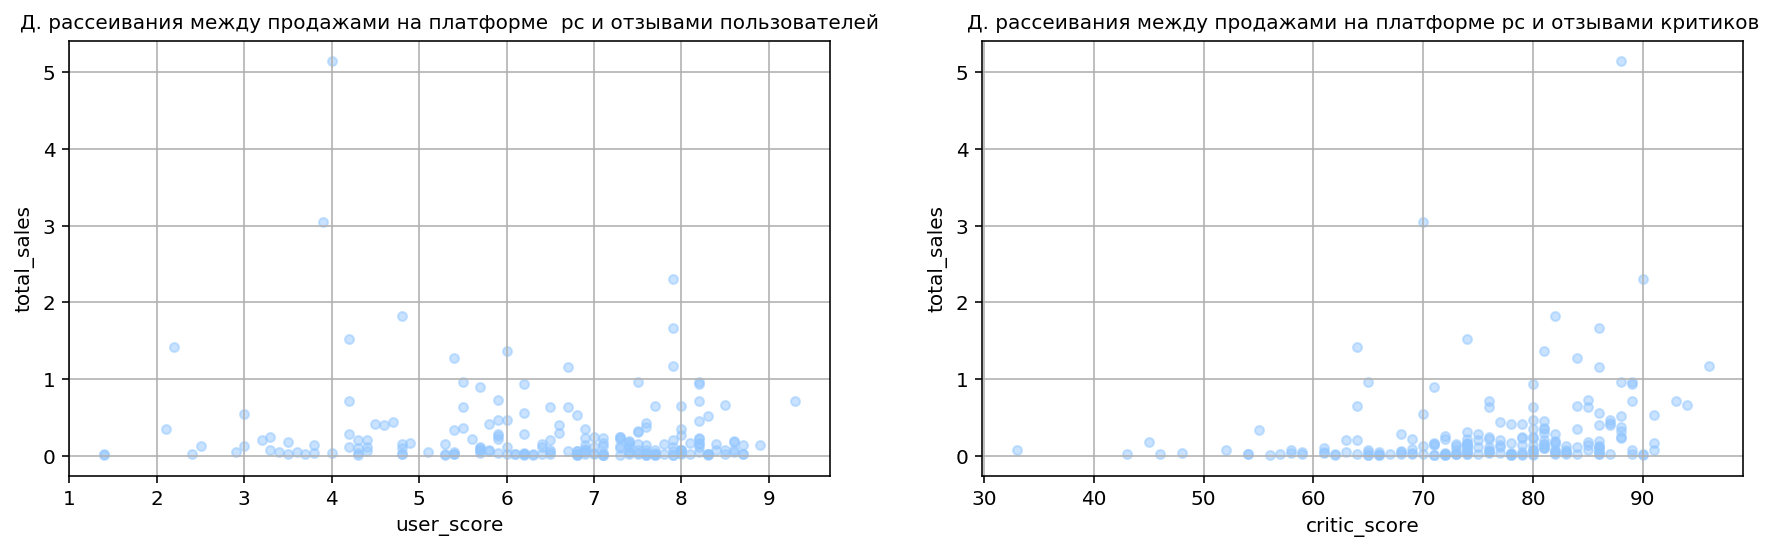

In [29]:
list = ['ps4', 'x360', '3ds',  'xone', 'wiiu', 'pc'] # построили диаграмму рассеивания 
for row in list:
    fig, axes = plt.subplots(1,2,figsize = (15,4))
    
    df_current_period.query('platform == @row and user_score!= -1').plot(x = 'user_score', 
                                                                         y = 'total_sales',
                                                                         kind = 'scatter', 
                                                                         alpha = 0.5, 
                                                                         grid = True,
                                                                         legend = True,
                                                                         ax = axes[0]);
    df_current_period.query('platform == @row').plot(x = 'critic_score', 
                                                     y = 'total_sales',
                                                     kind = 'scatter',
                                                     alpha = 0.5,
                                                     grid = True,
                                                     ax = axes[1]);
    axes[0].set_title('Д. рассеивания между продажами на платформе '+' ' + str(row) +' ' + 'и отзывами пользователей',size = 10)
   
   
    axes[1].set_title('Д. рассеивания между продажами на платформе'+' ' + str(row) +' ' + 'и отзывами критиков',size = 10)
    
    plt.show()
    

Распределение показывает,что по разным платформам происходит практически одинаковая ситуация, когда при небольших оценках пользователей продажи игр как находятся на минимальном уровне ,так и взлетают до максимального значения. А вот диаграмма  распределения продаж с отзывами критиков показывает,что чем выше оценка критика ,тем продаж становится все больше. При оценки критика **больше 70**,продажи игр увеличивается.

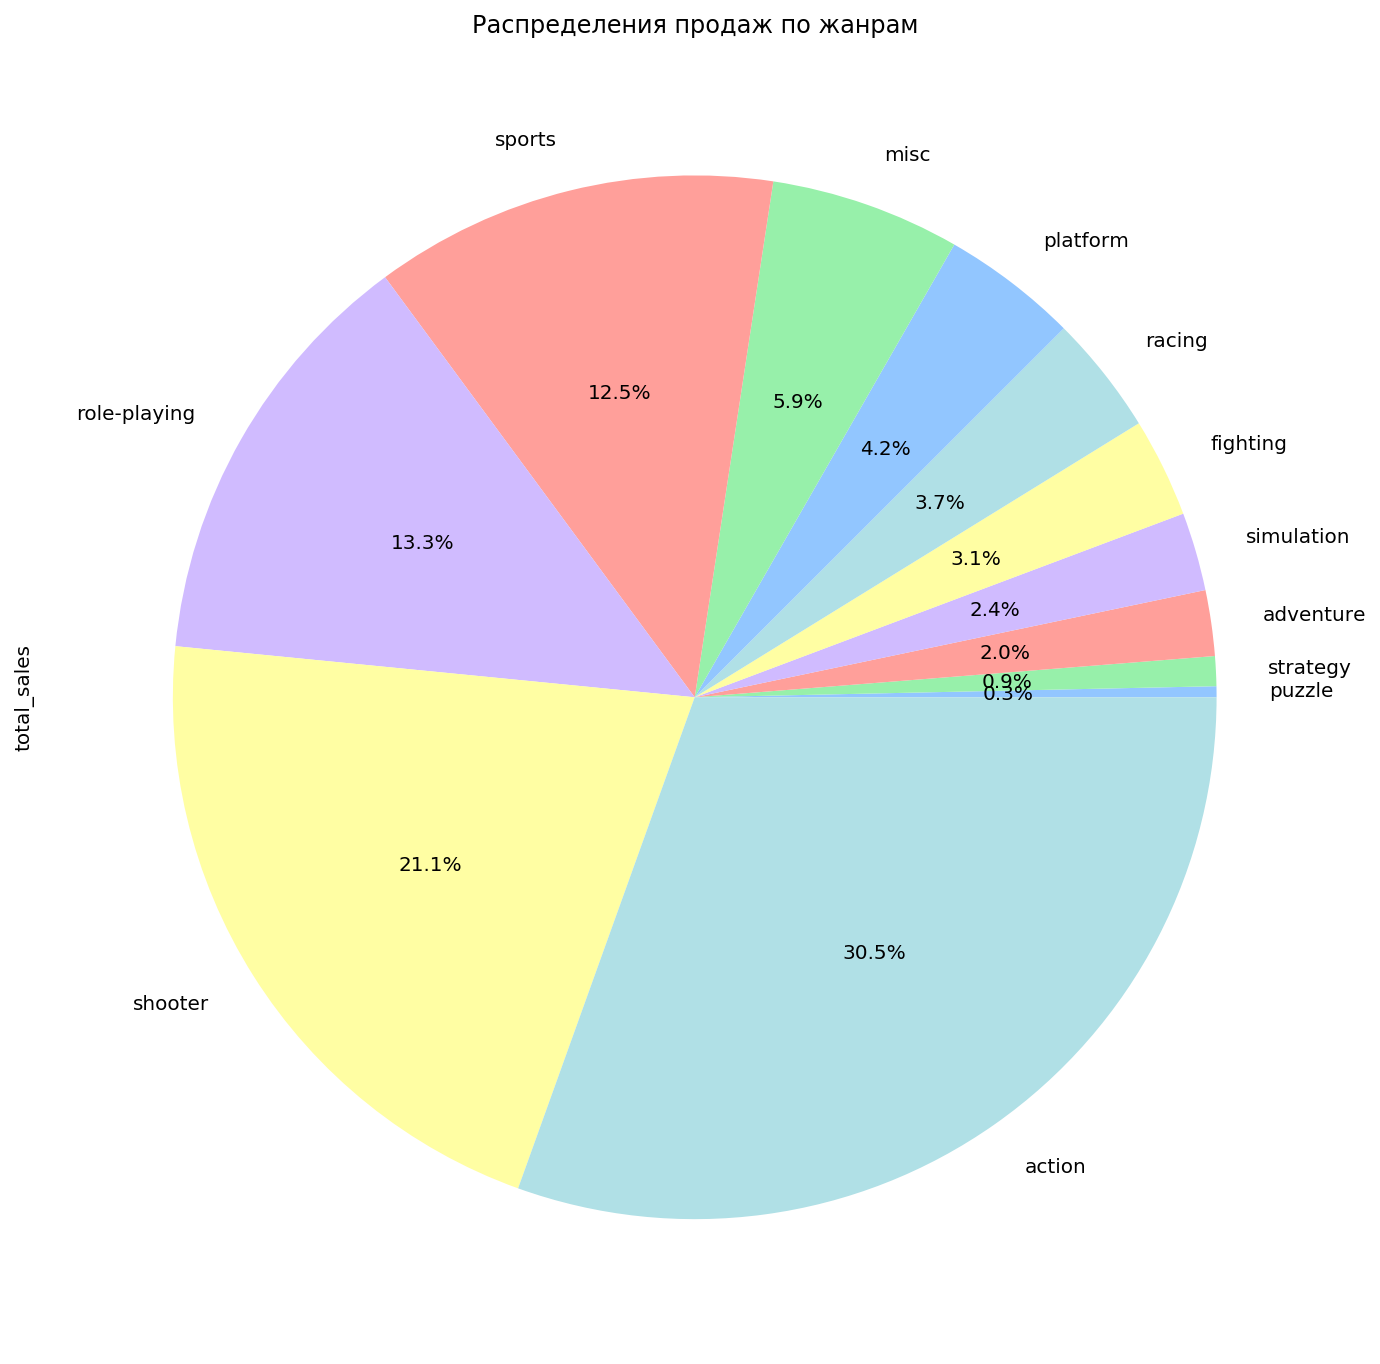

In [30]:
df_current_period.groupby('genre')['total_sales'].sum().sort_values().plot(kind='pie', # круговая диаграмма
                                                                           figsize=(20,12),
                                                                           title='Распределения продаж по жанрам',
                                                                           autopct='%1.1f%%');
       

Проиллюстрируем диаграмму размаха по жанрам.

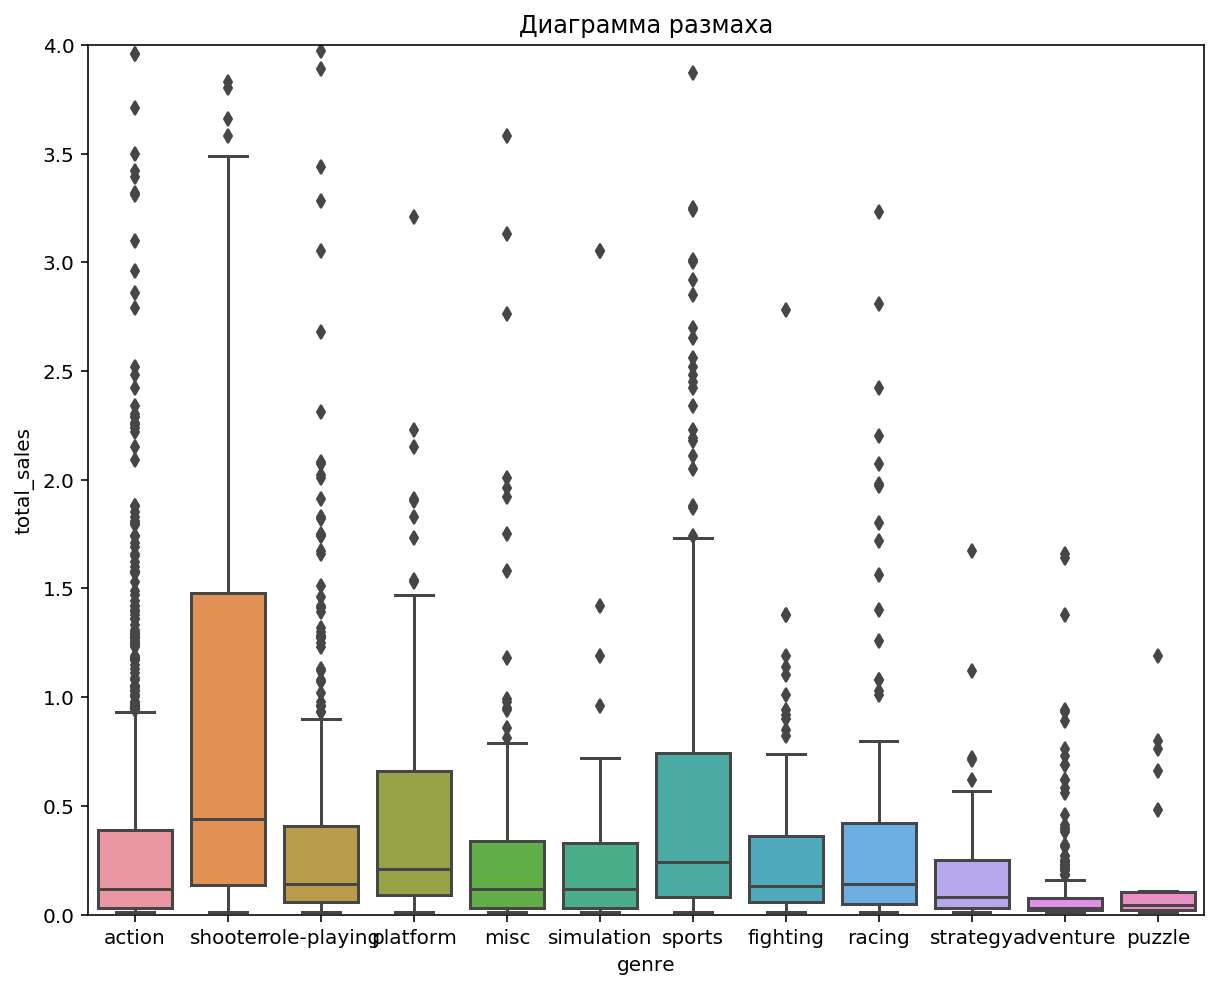

In [31]:
plt.figure(figsize=(10,8))# построили диаграмму размаха по платформам
(sns.boxplot(data = df_current_period, y ='total_sales' , x= 'genre').set(title='Диаграмма размаха',ylim=[0,4]))
plt.show();

Самый продаваемый жанр является **shooter** значения,которого находятся от 0 до 3,5 млн.Медиана составляет 0,45 млн. и Доля в продажах составляет **21 %**.
Далее остановился жанр **sport** с продажами на уровне от 0 до 1,75 млн. Доля продаж **12,5 %**.
Минимальные продажи показывают жанры **puzzle** и **adventure** продажи которых доходят до чуть меньше 0,5 млн.

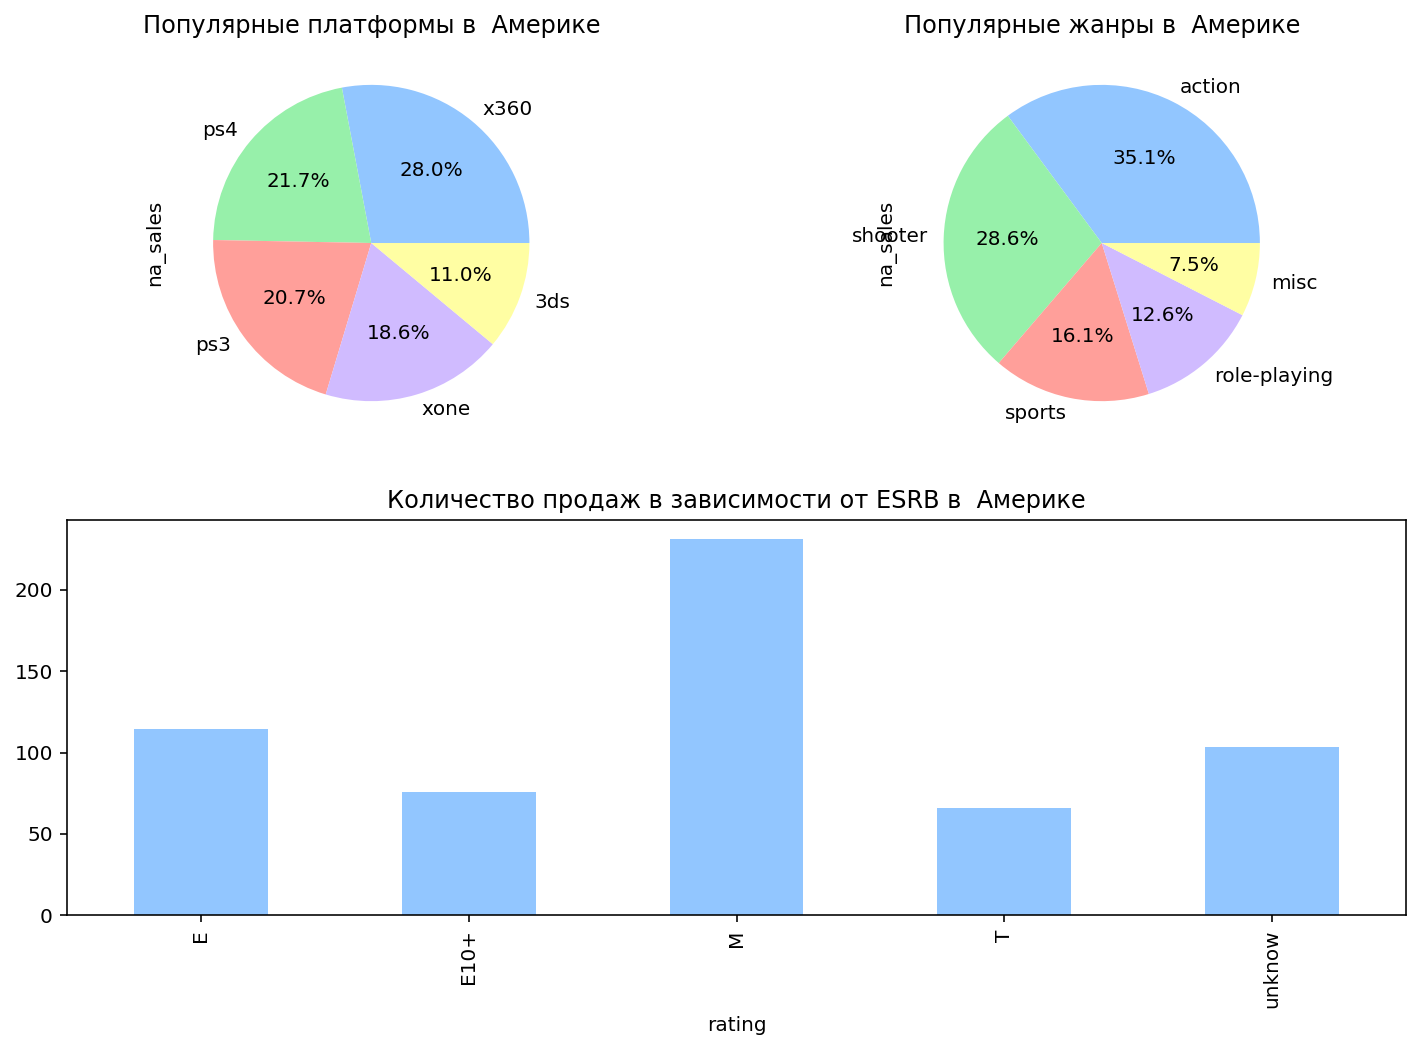

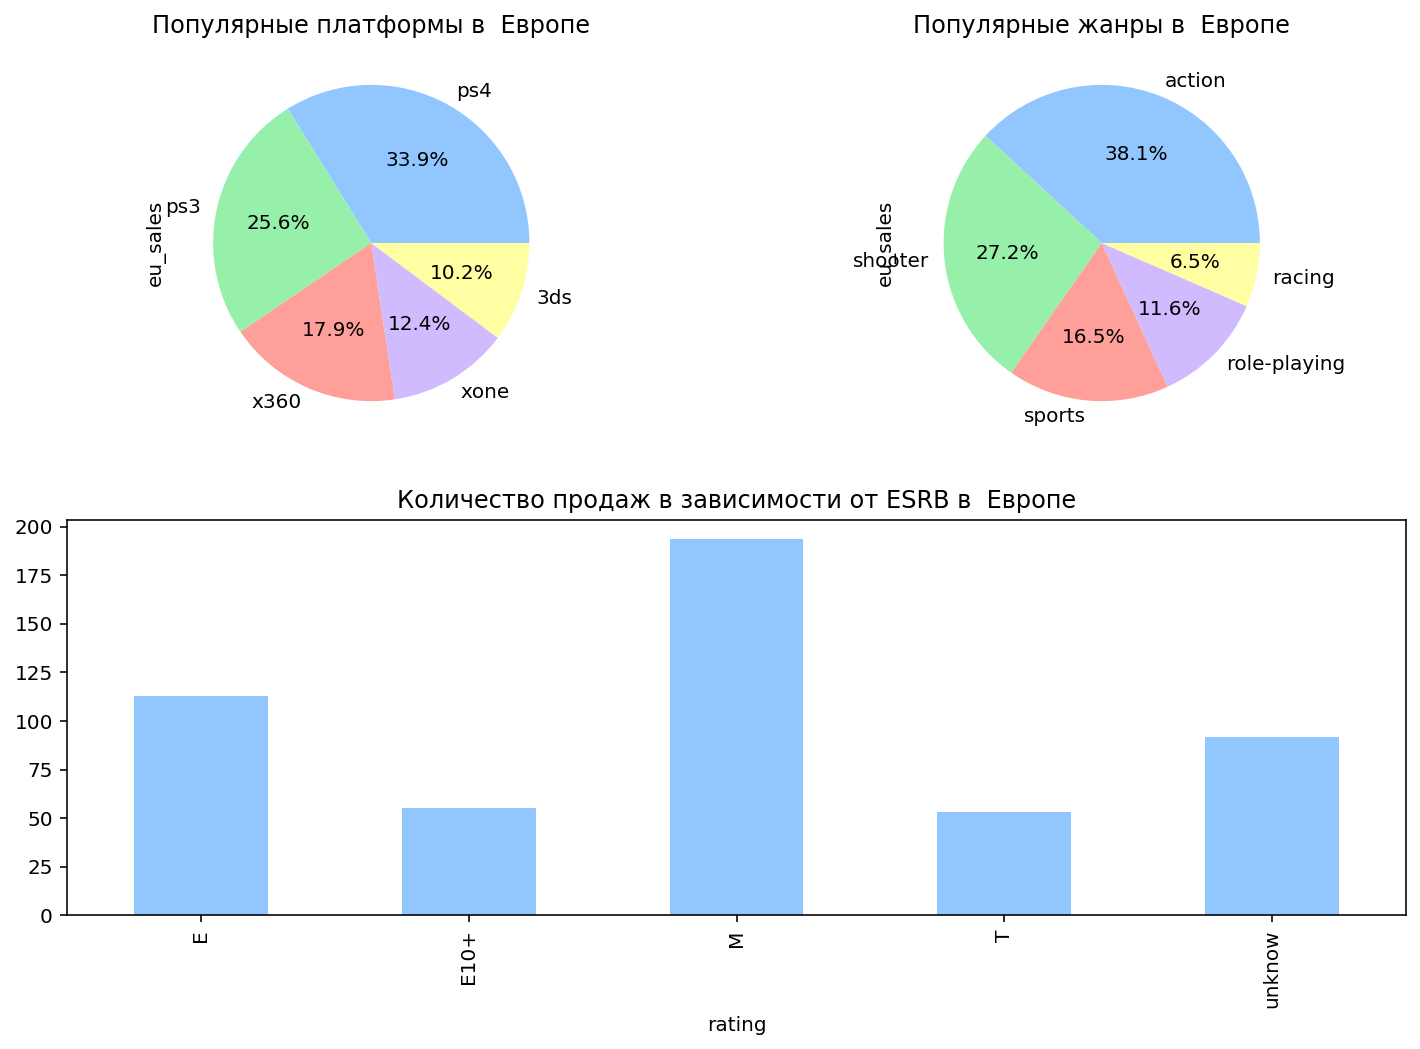

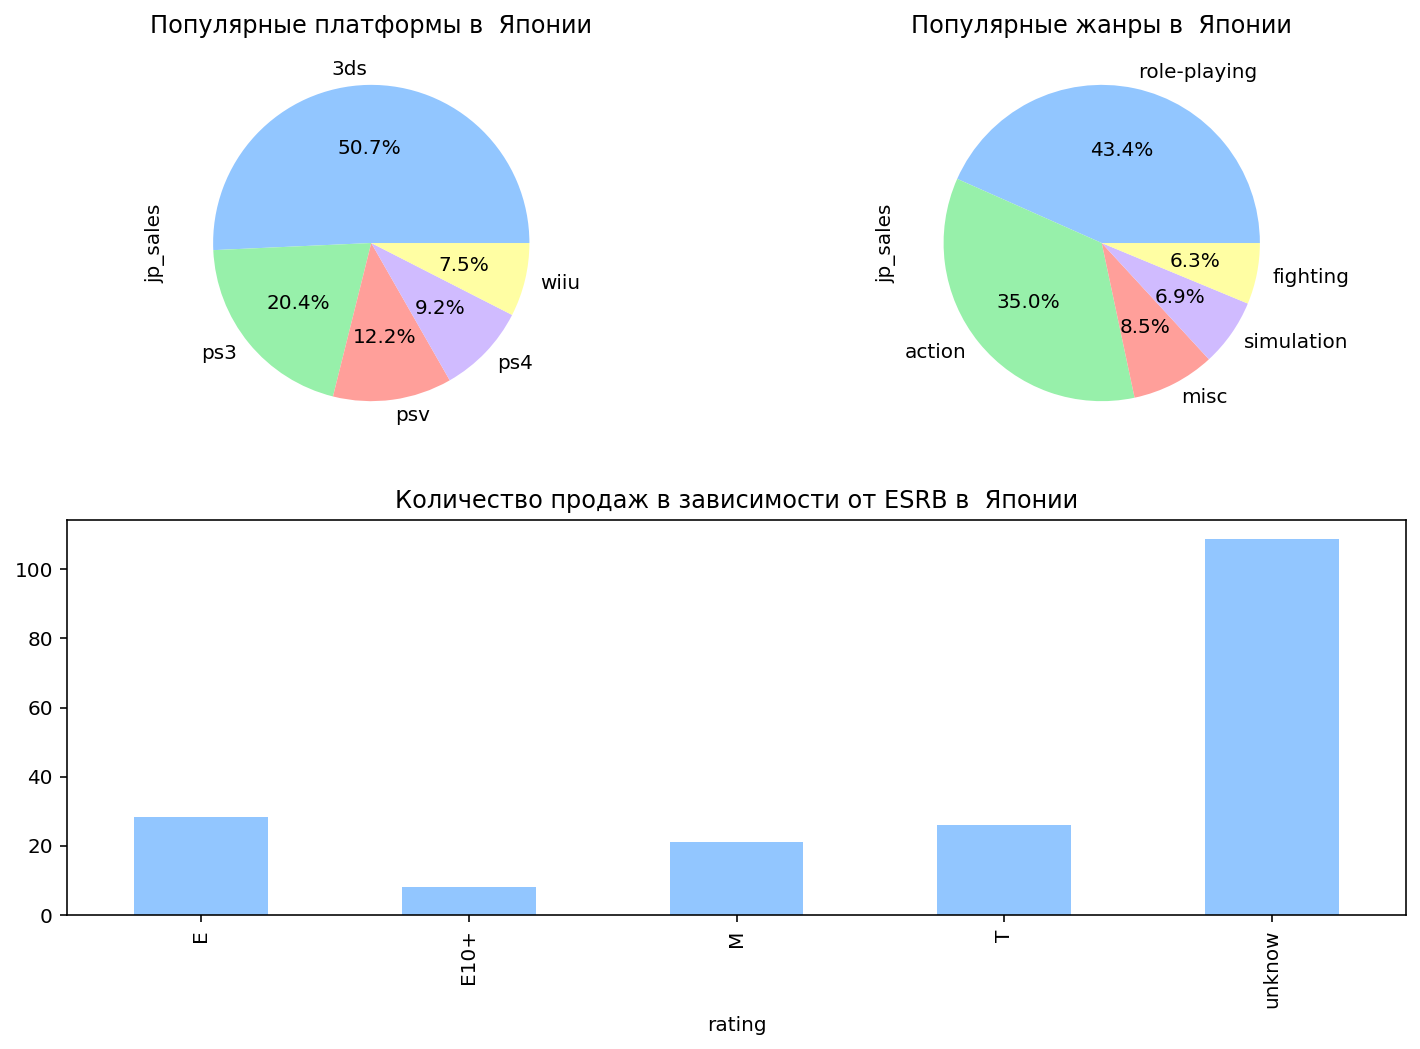

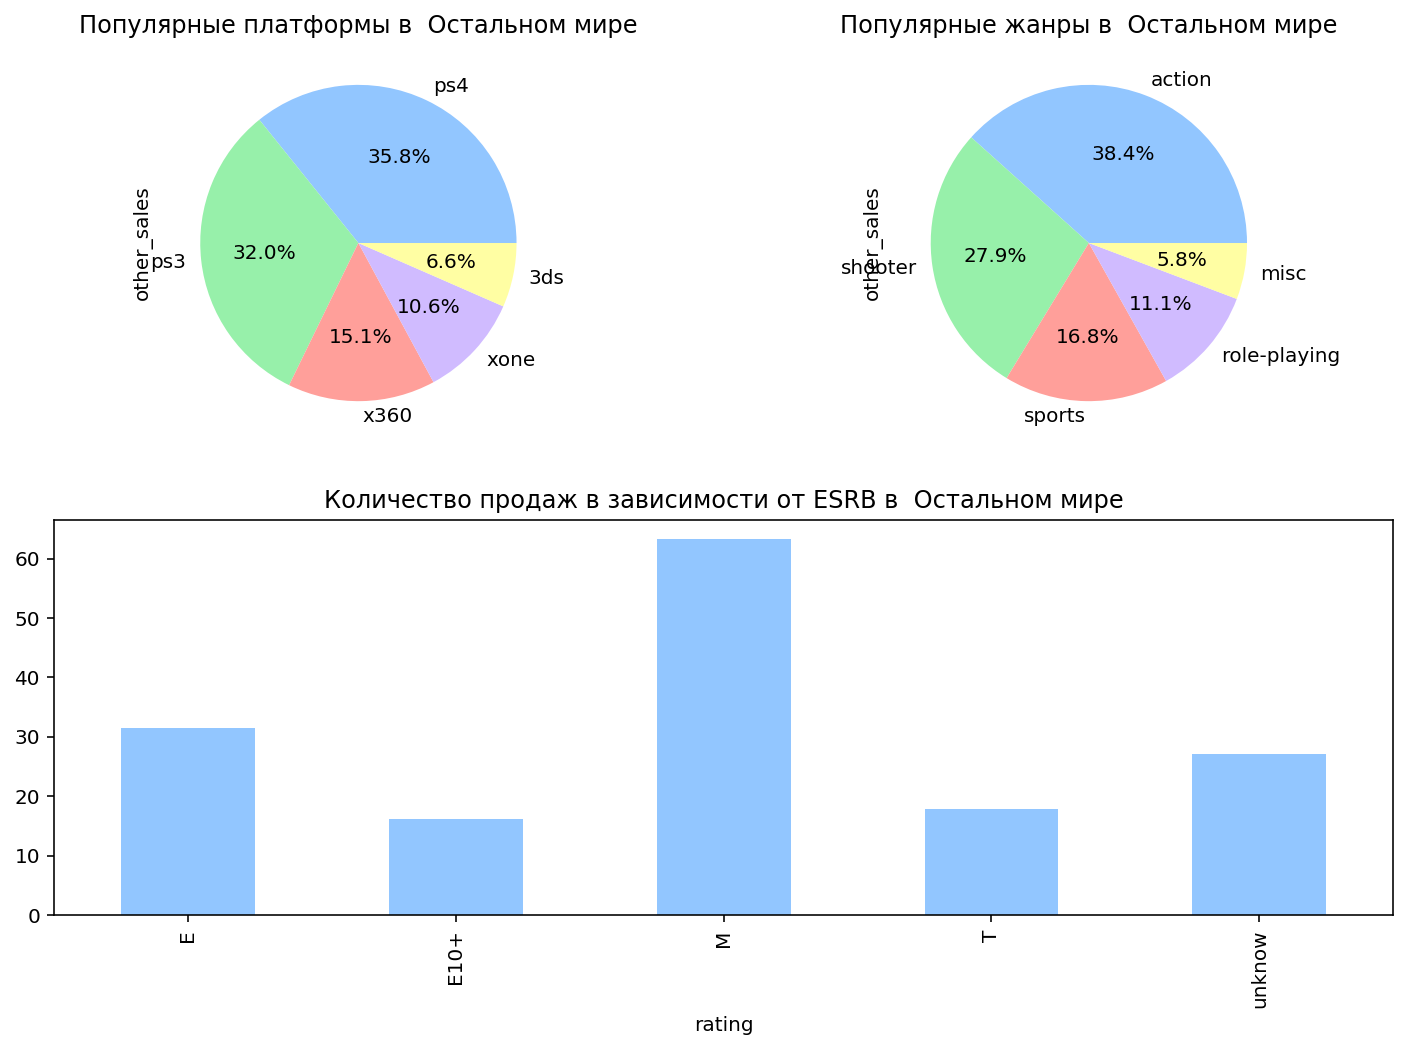

In [32]:
mainland = ['Америке','Европе','Японии','Остальном мире']
columns = ['na_sales','eu_sales','jp_sales','other_sales']

for row, name in zip(columns, mainland):
    
        fig = plt.figure()
        ax1 = fig.add_subplot(2, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        ax3 = fig.add_subplot(2, 1, 2)
        df_current_period.groupby('platform')[row].sum().sort_values(ascending = False).head(5).plot(kind = 'pie', 
                                                                                                     autopct = '%1.1f%%',
                                                                                                     ax = ax1,
                                                                                                     title = 'Популярные платформы в ' + ' ' + str(name));                                                                       title='Распределения продаж по жанрам',
        df_current_period.groupby('genre')[row].sum().sort_values(ascending = False).head(5).plot(kind = 'pie', 
                                                                                                  autopct = '%1.1f%%',
                                                                                                  ax = ax2,
                                                                                                  title = 'Популярные жанры в ' + ' ' + str(name));                                                                      
        df_current_period.groupby('rating')[row].sum().plot(kind = 'bar',
                                                            ax = ax3,
                                                            figsize = (12,8),
                                                            title = 'Количество продаж в зависимости от ESRB в ' + ' ' + str(name))
        plt.show()
                                                                    

In [33]:
# Комментарий ревьюера 
print(df_current_period.rating.isna().sum(), df_current_period.rating.isna().sum()/len(df))
df_current_period.rating.value_counts()

0 0.0


unknow    1275
M          498
T          412
E          395
E10+       306
Name: rating, dtype: int64

В **Америке**:

* Наиболее продаваемая платформа _x360_ . Практически одинаковые доли в продажах имеет платформы _ps4_ , _ps3_ , _xone_;

* Жанры востребованны такие как _action_ и _shooter_. Они занимают более **50%** от всех продаж топ 5 жанров;

* Наибольшие продажи были ,если рейтинг игры был `M` (от 17 лет).

В **Европе**:

* Тройка самых популярных платформ - _ps4_ , _ps3_ , _x360_. Доля каждой из них составляет **33%** , **25%**, **17%** соотвествено;
* По жанрам прослеживается аналогичная ситуация как и в по продажам в Америке. В топе _action_ и _shooter_;
* Высокие продажи наблюдаются ,если игра с ретингом `М`(от 17 лет).

В **Японии**:
* Больше **50%**  по продажам занимает платформа _3ds_. Следом расположилась платформа _ps3_ с **20** % от доли;
* Основные продажи приходятся на жанры _action_ и _role-playing_;
* Самые продаваемые игр относятся к рейтингу `Е`(для всех) , `Т`(от 13 лет) если рассматривать рейтинг ESRB. Но самые продаваемый рейтинг относится к значению `unknow`.


В **Остальном мире**:

* Платформы с самыми большими продажами - это _ps4_ , _ ps3_.
* Жанры имеющие  самые большие продажи - _action_, _shooter_, _sport_;
* Рейтинг в играм `М`(от 17 лет) преобладает в продажах.

### Вывод

* В 2008 году был пик продаж компьютерных игр, далее пошло заментное снижение;
* Зависимость между оценками критиков  и количество продаж имеет место быть;
* На текущий момент прибыльность имеет только две платформы - _ps4_ и _xone_;
* Продажи по континентам сильно не отличаются ,кроме продаж по Японии.

In [34]:
df_current_period.query('platform == "ps4" and rating == "M" and (genre == "action" or genre == "shooter")  and critic_score >= 70 and year_of_release == 2016')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
245,call of duty: infinite warfare,ps4,2016,shooter,1.61,2.00,0.15,0.71,77,3.4,M,4.47
289,battlefield 1,ps4,2016,shooter,1.10,2.15,0.21,0.61,88,8.4,M,4.07
325,tom clancy's the division,ps4,2016,shooter,1.35,1.70,0.15,0.60,80,7.0,M,3.80
708,far cry: primal,ps4,2016,action,0.60,1.25,0.06,0.35,76,6.3,M,2.26
1806,watch dogs 2,ps4,2016,action,0.37,0.58,0.00,0.18,83,7.8,M,1.13
2718,titanfall 2,ps4,2016,shooter,0.34,0.25,0.05,0.12,89,8.4,M,0.76
3157,dishonored 2,ps4,2016,action,0.22,0.32,0.00,0.10,88,7.7,M,0.64
5114,bioshock the collection,ps4,2016,shooter,0.10,0.19,0.02,0.06,84,8.5,M,0.37
5854,batman: arkham vr,ps4,2016,action,0.25,0.00,0.00,0.06,75,7.3,M,0.31
7505,assassin's creed the ezio collection,ps4,2016,action,0.04,0.13,0.00,0.03,72,7.4,M,0.20


## Проверка гипотез

* Нулевая гипотеза **Н0**:  средние пользовательские рейтинги платформ **Xbox One** и **PC** не отличаются друг от друга.
* Альтернативная гипотеза **Н1** : средние пользовательские рейтинги платформ **Xbox One** и **PC** значимо различны.

In [35]:
df_pc = df_current_period.query('platform == "pc" and user_score > -1') # фильтр по платформе "pc"

In [36]:
df_xone = df_current_period.query('platform == "xone" and user_score > -1') # фильтр по платформе "xone"

**Проверка на нормальность**

Для проверки гипотез определим какие перед нами распределения.

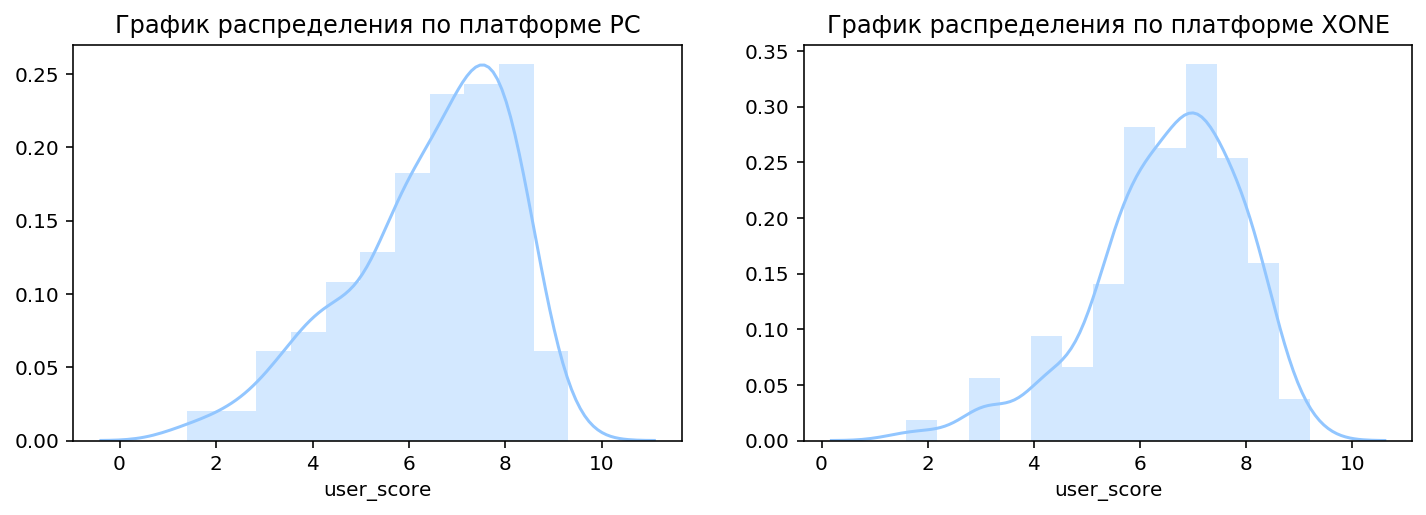

In [37]:
plt.figure(figsize=(12,8))# построили графики распределения
plt.subplot(2,2,1)
sns.distplot(df_pc['user_score']);
plt.title('График распределения по платформе PC')
plt.subplot(2,2,2)
sns.distplot(df_xone['user_score']);
plt.title('График распределения по платформе XONE')
plt.show()

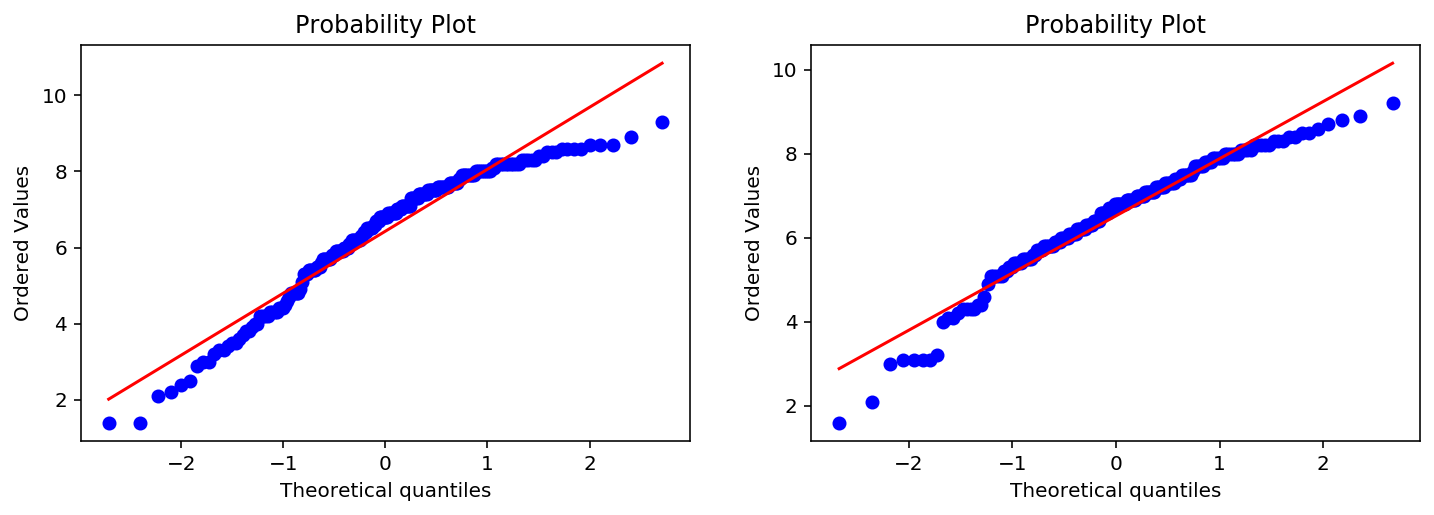

In [38]:
# строим qq-plot для нормального распределения
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(df_pc['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(df_xone['user_score'], dist="norm", plot=plt)
plt.show()

Исследуемые  распределения случайных величин  отличается от нормального распределения , в связи с этим использовали **непараметрический тест Манна-Уитни**

Уровень значимости: $\alpha = 0.05$

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [39]:
df_pc['user_score'].mean()# среднее значение выборки

6.4286407766990274

In [40]:
df_xone['user_score'].mean()# среднее значение выборки

6.521428571428572

In [41]:
results = st.mannwhitneyu(df_pc['user_score'], df_xone['user_score'], alternative='two-sided')
print('p-значение: ', results.pvalue)
alpha=0.05
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.8649062974699414
Не получилось отвергнуть нулевую гипотезу


Значение p-value  получилось достоточно большим ,поэтому оснований отвергнуть нулевую гипотезу о равенстве долей нет. Средний пользовательский рейтинг по платформам  _Xbox One_ и _PC_ различается незначимо.

* Нулевая гипотеза **Н0**:  Средние пользовательские рейтинги жанров **action** и **sports** не отличаются друг от друга.
* Альтернативная гипотеза **Н1** : Средние пользовательские рейтинги жанров **action** и **sports** значимо различны.

In [42]:
df_action = df_current_period.query('genre == "action" and user_score > = 0') # фильтр по по жанру "action"

In [43]:
df_sports = df_current_period.query('genre == "sports" and user_score >= 0') # фильтр по по жанру "sports"

**Проверка на нормальность распределения**

Для проверки гипотез определим какие перед нами распределения.

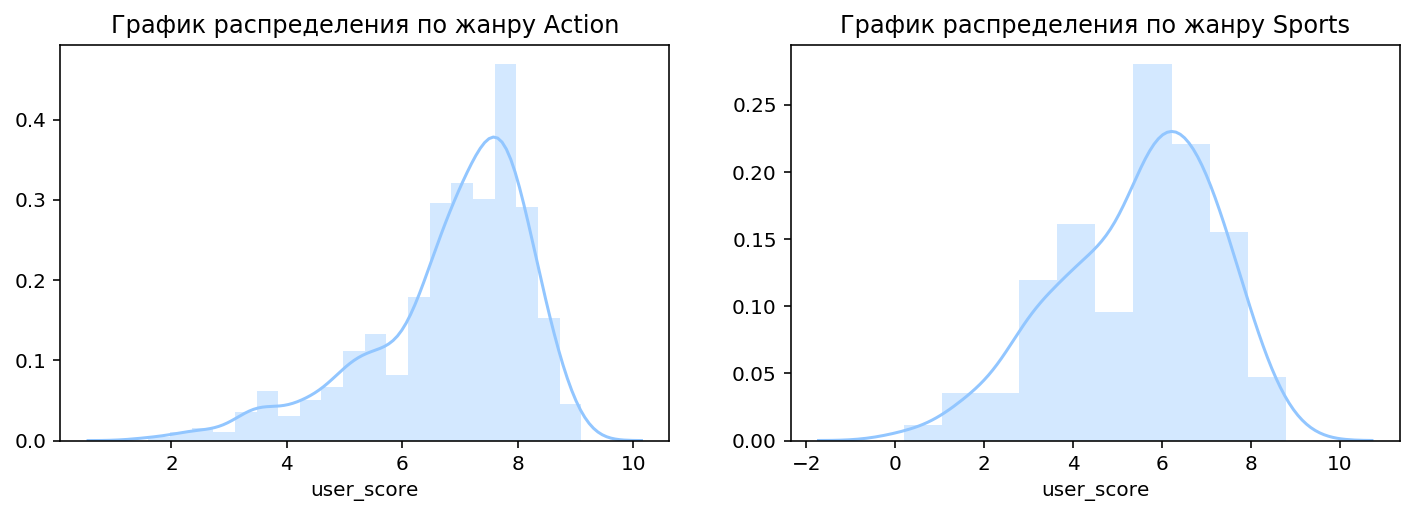

In [44]:
plt.figure(figsize=(12,8))# построили графики распределения
plt.subplot(2,2,1)
sns.distplot(df_action['user_score'])
plt.title('График распределения по жанру Action');
plt.subplot(2,2,2)
sns.distplot(df_sports['user_score']);
plt.title('График распределения по жанру Sports')
plt.show()

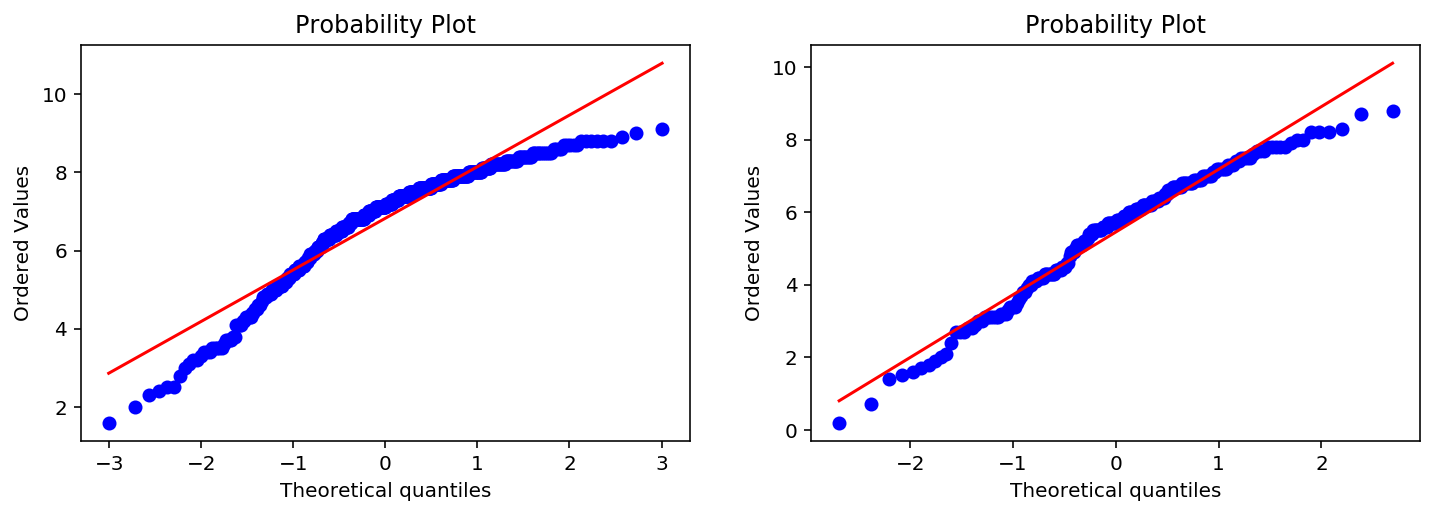

In [45]:
# строим qq-plot для нормального распределения
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(df_action['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(df_sports['user_score'], dist="norm", plot=plt)
plt.show()

Исследуемые  распределения случайных величин  отличается от нормального распределения , в связи с этим использовали **непараметрический тест Манна-Уитни**

Уровень значимости: $\alpha = 0.05$

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [46]:
df_action['user_score'].mean()# среднее значение выборки

6.825047801147227

In [47]:
df_sports['user_score'].mean()# среднее значение выборки

5.455897435897437

In [48]:
results = st.mannwhitneyu(df_action['user_score'], df_sports['user_score'], alternative='two-sided')
print('p-значение: ', results.pvalue)
alpha=0.05
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.1428765201928685e-23
Отвергаем нулевую гипотезу


Значение p-value низкое,поэтому гипотезу о равенстве отвергаем.Статистически значимая разница между двумя жанрами существует.

### Вывод

Нулевая гипотеза о равенстве среднего пользовательского рейтинга  между жанров `action` и `sports` не подтвердилось.  На уровне значимости 0.05 гипотеза о равенстве среднего пользовательского рейтинга между платформами `Xbox One` и `PC`  подтвердилась.

## Общий вывод

На основе полученных данных можно сделать вывод, что:

1. Продажи по играм начиная с 2008 года просели около 50%;

2. Потенциальные покупатели игр рассматривают оценки критиков в основном как неотъемлемую часть преде покупкой игры;

3. Пользовательские рейтинге не влияют на продажи;

3. Покупатели наиболее предпочитают в Европе, Америке и Остальном мире жанры - `shooter` и `sport`;

4. В Японии популярно `action` и `role-playing`;

5. Основной контенген пользователей начинается с 17 лет;

6. Платформы `ps4` , `ps3` , `x360` приносили больше всего прибыли;

7. Платформ `ps4` и `xone` имеют положительную динамику продаж.




Утверждать точно по полученным данным на какой продукт сделать ставку не предоставляется возможным. Можно предположить,в связи с тем ,что платформа `ps4` имеет  положительную динамику по продажам, а также  вышла на рынок  в 2013 году. Потенциал у данной платформ останется на 2017 год. Если рассматривать жанр игр , то в Европе рационально рассмотреть жанры ,такие как `sport` и `shooter`. Компьютерные игры должны быть для детей от 17 лет. Также стоит уделить внимание оценки критиков. Они должны быть выше 70. Но если рассматривать рынок Японии , то необходимо рассмотреть рейтинг предназначенный для маркировки игр в этой стране.  